In [1]:
import argparse
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

/Users/richardknoche/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/richardknoche/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


# Image Blurriness

(578, 770, 3) -> (600, 799, 3)


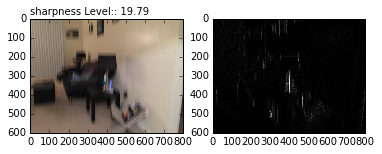

In [7]:
#Method -- calculate variance of 2nd derivative using Laplacian kernel
image = cv2.imread('/Users/richardknoche/Desktop/TestImages/Blur/Blurry/Couch3.jpg')

scaler = np.min([800.0/image.shape[0], 800.0/image.shape[1]])
new_image = cv2.resize(image,(np.int(scaler*image.shape[1]),np.int(scaler*image.shape[0])),interpolation=cv2.INTER_AREA)
print(image.shape,"->",new_image.shape)
image=new_image

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
blur_amount = laplacian.var()

#matplotlib expets RGB image, so use cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB) 
#or cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].text(0,-20,"{}: {:.2f}".format('sharpness Level:', blur_amount))
ax[1].imshow(np.abs(laplacian),cmap='gray',vmax=100)


(249, 310, 3) -> (642, 800, 3)


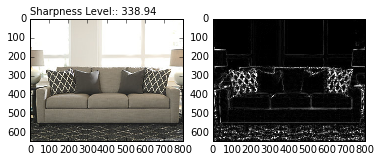

In [8]:
image = cv2.imread('/Users/richardknoche/Desktop/TestImages/Blur/Sharp/Couch1.jpg')

scaler = np.min([800.0/image.shape[0], 800.0/image.shape[1]])
new_image = cv2.resize(image,(np.int(scaler*image.shape[1]),np.int(scaler*image.shape[0])),interpolation=cv2.INTER_AREA)
print(image.shape,"->",new_image.shape)
image=new_image

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
blur_amount = laplacian.var()

#matplotlib expets RGB image, so use cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB) 
#or cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].text(0,-20,"{}: {:.2f}".format('Sharpness Level:', blur_amount))
ax[1].imshow(np.abs(laplacian),cmap='gray',vmax=100)

# Fourier Transform for Blurryness

(275, 183, 3) -> (800, 532, 3)


/Users/richardknoche/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


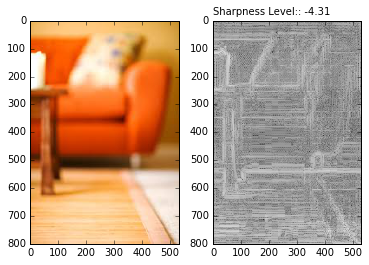

In [9]:
image = cv2.imread('/Users/richardknoche/Desktop/TestImages/Blur/Blurry/Couch2.jpg')
scaler = np.min([800.0/image.shape[0], 800.0/image.shape[1]])
new_image = cv2.resize(image,(np.int(scaler*image.shape[1]),np.int(scaler*image.shape[0])),interpolation=cv2.INTER_AREA)
print(image.shape,"->",new_image.shape)
image=new_image

img_gry = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
rows, cols = img_gry.shape
crow, ccol = rows/2, cols/2
f = np.fft.fft2(img_gry)
fshift = np.fft.fftshift(f)
fshift[crow-75:crow+75, ccol-75:ccol+75] = 0
f_ishift = np.fft.ifftshift(fshift)
img_fft = np.fft.ifft2(f_ishift)
img_fft = 20*np.log(np.abs(img_fft))

result = np.mean(img_fft)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.text(0,-20,"{}: {:.2f}".format('Sharpness Level:', result))
ax[1].imshow(img_fft,cmap='gray')



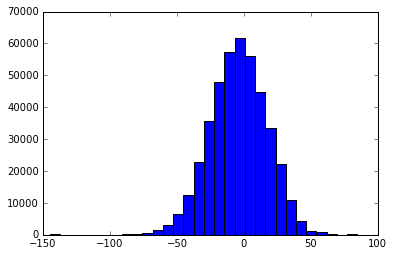

In [10]:
count,edge,img = plt.hist(img_fft.ravel(),bins=30)

(800, 1199, 3) -> (533, 799, 3)


/Users/richardknoche/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


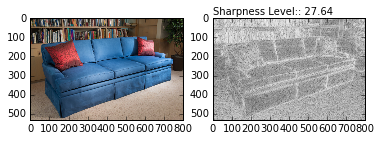

In [11]:
image = cv2.imread('/Users/richardknoche/Desktop/TestImages/Blur/Sharp/Couch3.jpg')
scaler = np.min([800.0/image.shape[0], 800.0/image.shape[1]])
new_image = cv2.resize(image,(np.int(scaler*image.shape[1]),np.int(scaler*image.shape[0])),interpolation=cv2.INTER_AREA)
print(image.shape,"->",new_image.shape)
image=new_image

img_gry = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
rows, cols = img_gry.shape
crow, ccol = rows/2, cols/2
f = np.fft.fft2(img_gry)
fshift = np.fft.fftshift(f)
fshift[crow-75:crow+75, ccol-75:ccol+75] = 0
f_ishift = np.fft.ifftshift(fshift)
img_fft = np.fft.ifft2(f_ishift)
img_fft = 20*np.log(np.abs(img_fft))

result = np.mean(img_fft)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.text(0,-20,"{}: {:.2f}".format('Sharpness Level:', result))
ax[1].imshow(img_fft,cmap='gray')


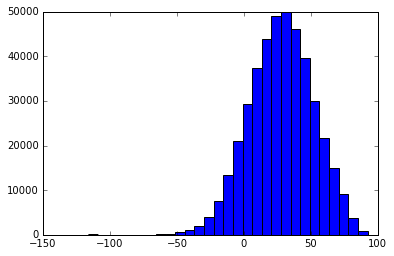

In [12]:
count,edge,img = plt.hist(img_fft.ravel(),bins=30)